# Twitter Sentiment Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
 
# downloading
nltk.download('stopwords')

# hiding warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# setting the style
sns.set_style()

# displaying more information
pd.set_option('display.max_rows', 120)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tulik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_search = pd.read_csv('data/tweets_search.csv')
df_search.head()

,Tweet Content,Date,User,Source,Tweet ID,Tweet URL
0,#Pharmacies instituting anti-hoarding measures...,2020-04-19 23:59:59,HealthcareHwy,HubSpot,1252024177068048384,https://twitter.com/statuses/1252024177068048384
1,Dems play ‘blame game’ while republicans try t...,2020-04-19 23:59:52,wittroc63675401,Twitter for iPhone,1252024145841393666,https://twitter.com/statuses/1252024145841393666
2,"Watch We R Listening's 1st V~Log: ""COVID-19 an...",2020-04-19 23:59:49,WeRListning,Twitter for Android,1252024132398649345,https://twitter.com/statuses/1252024132398649345
3,"WBAI 99.5FM. TODAY, Monday 4-20, 7PM EST.\nBui...",2020-04-19 23:59:48,bbridgesradio,Twitter Web App,1252024129034817538,https://twitter.com/statuses/1252024129034817538
4,#Trump says he’d be willing to give #coronavir...,2020-04-19 23:59:46,Newzjunkie_,Tweetbot for iΟS,1252024120268804102,https://twitter.com/statuses/1252024120268804102


Analyzing the public opinion on Donald Trump amidst the Corovanavirus global pandemic. The dataset was obtained by me using the Tweepy library, and the Twitter API. The data was retrieved on April 20th 2020.

In [3]:
# distribution of the data
df_search.describe(include='O')

,Tweet Content,Date,User,Source,Tweet URL
count,1445,1445,1445,1445,1445
unique,1445,1172,1134,50,1445
top,It strikes me that many of those Americans pro...,2020-04-19 23:00:00,MaceNewsMacro,Twitter for iPhone,https://twitter.com/statuses/1252011493731827716
freq,1,7,30,503,1


Every tweet is unique since retweets were filtered out when collecting the data.
The account that posted the most tweets in our dataset was @MaceNewsMacro.


In [4]:
df_search['Tweet'] = df_search['Tweet Content'] 
df = df_search[['Tweet', 'User', 'Date']].copy()
df.head()

,Tweet,User,Date
0,#Pharmacies instituting anti-hoarding measures...,HealthcareHwy,2020-04-19 23:59:59
1,Dems play ‘blame game’ while republicans try t...,wittroc63675401,2020-04-19 23:59:52
2,"Watch We R Listening's 1st V~Log: ""COVID-19 an...",WeRListning,2020-04-19 23:59:49
3,"WBAI 99.5FM. TODAY, Monday 4-20, 7PM EST.\nBui...",bbridgesradio,2020-04-19 23:59:48
4,#Trump says he’d be willing to give #coronavir...,Newzjunkie_,2020-04-19 23:59:46


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   1445 non-null   object
 1   User    1445 non-null   object
 2   Date    1445 non-null   object
dtypes: object(3)
memory usage: 34.0+ KB


In [6]:
def cleantext(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#'
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

In [7]:
df['Tweet'] = df['Tweet'].apply(cleantext)#cleaning tweets
df.head()

,Tweet,User,Date
0,Pharmacies instituting anti-hoarding measures ...,HealthcareHwy,2020-04-19 23:59:59
1,Dems play ‘blame game’ while republicans try t...,wittroc63675401,2020-04-19 23:59:52
2,"Watch We R Listening's 1st V~Log: ""COVID-19 an...",WeRListning,2020-04-19 23:59:49
3,"WBAI 99.5FM. TODAY, Monday 4-20, 7PM EST.\nBui...",bbridgesradio,2020-04-19 23:59:48
4,Trump says he’d be willing to give coronavirus...,Newzjunkie_,2020-04-19 23:59:46


In [8]:
df['Subjectivity'] = df['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)
df['Polarity'] = df['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

df.head()

,Tweet,User,Date,Subjectivity,Polarity
0,Pharmacies instituting anti-hoarding measures ...,HealthcareHwy,2020-04-19 23:59:59,1.00,0.00
1,Dems play ‘blame game’ while republicans try t...,wittroc63675401,2020-04-19 23:59:52,0.40,-0.40
2,"Watch We R Listening's 1st V~Log: ""COVID-19 an...",WeRListning,2020-04-19 23:59:49,0.00,0.00
3,"WBAI 99.5FM. TODAY, Monday 4-20, 7PM EST.\nBui...",bbridgesradio,2020-04-19 23:59:48,0.30,0.00
4,Trump says he’d be willing to give coronavirus...,Newzjunkie_,2020-04-19 23:59:46,0.75,0.25


Subjectivity : how subjective or opinionated the text is — a score of 0 is fact, and a score of +1 is very much an opinion <br>
Polarity : how positive or negative the text is, — score of -1 is the highest negative score, and a score of +1 is the highest positive score

In [9]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
 
# downloading
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tulik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
all_tweets = " ".join(d for d in df['Tweet'])

stopwords = set(STOPWORDS)

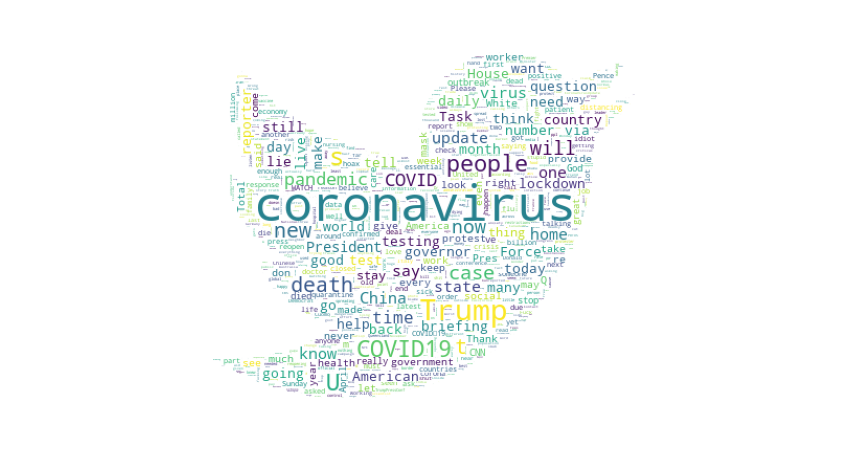

In [11]:
# creating a mask
twitter_mask = np.array(Image.open("twitter3.png"))

# creating a new wordcloud
wordcloud=WordCloud(stopwords=stopwords,
                    background_color="white", collocations=False,
                    mask=twitter_mask, width=1000, height=1000, max_words=3000,
                    max_font_size=200, min_font_size=1).generate(all_tweets)

# plotting the wordcloud
fig, ax = plt.subplots(figsize=(15,15));
ax.imshow(wordcloud, interpolation='bilinear');
ax.set_axis_off();

plt.imshow(wordcloud);


In [12]:
# function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head()

,Tweet,User,Date,Subjectivity,Polarity,Analysis
0,Pharmacies instituting anti-hoarding measures ...,HealthcareHwy,2020-04-19 23:59:59,1.00,0.00,Neutral
1,Dems play ‘blame game’ while republicans try t...,wittroc63675401,2020-04-19 23:59:52,0.40,-0.40,Negative
2,"Watch We R Listening's 1st V~Log: ""COVID-19 an...",WeRListning,2020-04-19 23:59:49,0.00,0.00,Neutral
3,"WBAI 99.5FM. TODAY, Monday 4-20, 7PM EST.\nBui...",bbridgesradio,2020-04-19 23:59:48,0.30,0.00,Neutral
4,Trump says he’d be willing to give coronavirus...,Newzjunkie_,2020-04-19 23:59:46,0.75,0.25,Positive


In [13]:
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweet'][i])
    print()
    j= j+1

Printing positive tweets:

1) Trump says he’d be willing to give coronavirus aid to Iran   (via)

2)  is off the rails yet again.....can’t be honest at all. Defensive, combative, and a liar. coronavirus LiarInChief 

3) coronavirus deaths in Italy display huge, clustered quasi-geographical differences 

4) Join us Friday, April 24 at 1:30 p.m. for a virtual panel discussion on Coronavirus and how to StaySafeAtHome Hear the latest information about coronavirus (COVID-19) and what you need to know to protect yourself and your family. We’ll also provide... 

5) Yes, travel will go back to normal after coronavirus. Here's why —  

6) Don’t faint but I actually requested two non-fiction books from  for review!!! I’ve heard great things about both and would like to step out of my reading comfort zone at the moment. And I’m keen to reflect on their messaging. lessons coronavirus 

7) Trump knows good & gd well a q-tip won't work for coronavirus testing.
Cheap a--hole
He wants to still ALL of 

In [14]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweet'][i])
    print()
    j=j+1

Printing negative tweets:

1) Dems play ‘blame game’ while republicans try to ‘problem solve’

coronavirus politics

2) If anyone wondered how Germans could have supported Hitler, look no further than the Trump cult members that will believe anything he says. If a Dem was POTUS, they’d be protesting that US hadn’t done enough shut down coronavirus covidUSA 

3) I know a lot of people are calling for the cable news channels to stop covering the daily Trump coronavirus PressBriefing. But maybe what we really need is for every network and cable channel to cover them so every American is forced to see how unhinged the president is.

4) At least we don’t have Monday blues anymore... every days the same 🤣🤣🤣coronavirus StayatHome

5) Even under urgent warnings of his CDC, Intel Agencies & Advisors this failed Impeached president missed almost 3 months to stop the Coronavirus allowing a fast spread and now cynically just wants to change facts and claim credit he doesn’t deserve and politicizes

In [15]:
from pywaffle import Waffle
import warnings
warnings.filterwarnings('ignore')

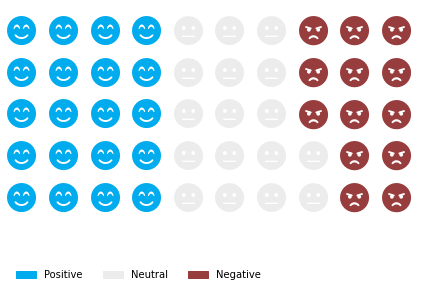

Tweets:
 Positive    564
Neutral     487
Negative    394
Name: Analysis, dtype: int64


Percentage for each sentiment:
 Positive    39.031142
Neutral     33.702422
Negative    27.266436
Name: Analysis, dtype: float64


In [16]:
data = df.Analysis.value_counts().to_dict()

# plotting a waffle chart
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=10,
                colors=("#00acee", "#ececec", "#983D3D"),
                values=data, icons=('smile-beam','meh', 'angry'), icon_size=30,
                legend={'loc': 'lower left', 'bbox_to_anchor':  (0, -0.4), 'framealpha': 0,
                        'ncol': len(data)},
                icon_legend=False, 
                )
fig.set_tight_layout(True)
plt.show();

# show the quantity of each type of listing available
print('Tweets:\n',df.Analysis.value_counts())
print('\n')
# show the percentage of each type of listing available
print('Percentage for each sentiment:\n',df.Analysis.value_counts() / df.shape[0] * 100)

<IPython.core.display.Javascript object>


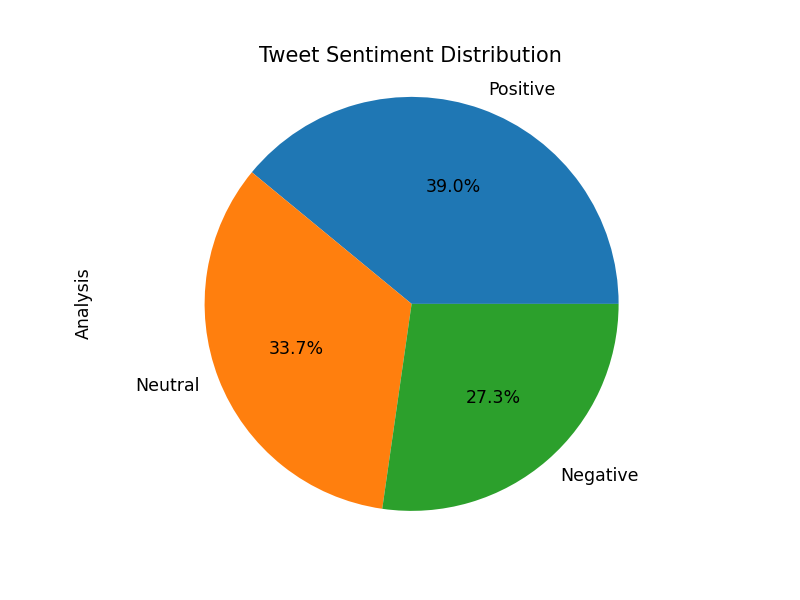

In [17]:
%matplotlib notebook
fig=df.Analysis.value_counts().plot(kind='pie', autopct='%1.1f%%')
fig.set_title("Tweet Sentiment Distribution")
plt.axis('equal')
plt.show()